In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegressionCV

from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils

iris = sns.load_dataset("iris")

X = iris.values[:, :4]
y = iris.values[:, 4]



Accuracy = 0.83


In [14]:
print simpleLR(X, y)

Accuracy = 0.83


In [15]:
print simpleNN(X, y)

75/75 [==============================] - 0s 259us/step
Accuracy = 0.99


In [10]:
def simpleLR(X, y):
    train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.5, random_state=0)
    lr = LogisticRegressionCV()
    lr.fit(train_X, train_y)
    return("Accuracy = {:.2f}".format(lr.score(test_X, test_y)))

In [12]:
def one_hot_encode_object_array(arr):
    '''One hot encode a numpy array of objects (e.g. strings)'''
    uniques, ids = np.unique(arr, return_inverse=True)
    return np_utils.to_categorical(ids, len(uniques))

def simpleNN(X, y):
    train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.5, random_state=0)
    train_y_ohe = one_hot_encode_object_array(train_y)
    test_y_ohe = one_hot_encode_object_array(test_y)

    model = Sequential()
    model.add(Dense(16, input_shape=(4,)))
    model.add(Activation('sigmoid'))
    model.add(Dense(3))
    model.add(Activation('softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])
    model.fit(train_X, train_y_ohe, nb_epoch=100, batch_size=1, verbose=0);
    loss, accuracy = model.evaluate(test_X, test_y_ohe)
    return("Accuracy = {:.2f}".format(accuracy))

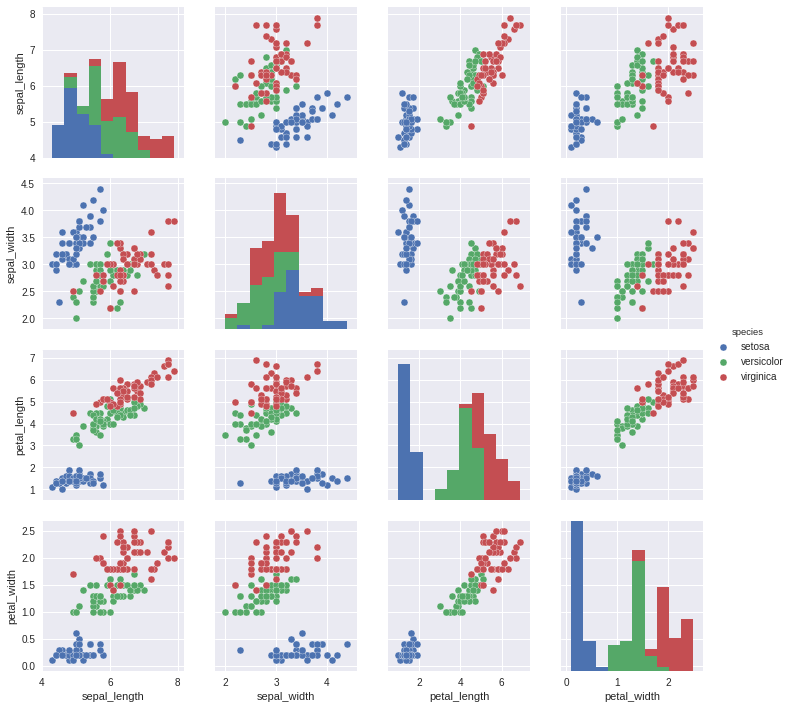

In [16]:
sns.pairplot(iris, hue='species');
#but what happens if there are more than 4 non-target features?
#how do I assess and limit this visual to the most important features?